In [325]:
# load correlation matrices
import numpy as np
import matplotlib.pyplot as plt

trt1_ses1 = np.load('/home/or/kpe_conn/trauma_ses_1.npy')
trt1_ses2 = np.load('/home/or/kpe_conn/trauma_ses_2.npy')

In [326]:
print (f'Shape of 1 {trt1_ses1.shape}')
print (f'Shape of 2 {trt1_ses2.shape}')

Shape of 1 (21, 268, 268)
Shape of 2 (21, 268, 268)


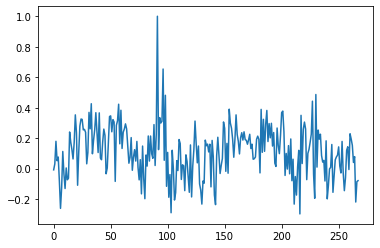

In [375]:
plt.plot(trt1_ses1[0][:,91])

In [327]:
# load clinical data
import pandas as pd
allDat = pd.read_csv('/home/or/Documents/kpe_analyses/KPEIHR0009_DATA_2019-10-07_1121.csv')

In [328]:
allDat.head()

,scr_id,redcap_event_name,contact,vet_status,va_consent,va_consent_date,yale_consent,yale_consent_date,eligibillity,mri_clearance,...,pclm_10,pclm_11,pclm_12,pclm_13,pclm_14,pclm_15,pclm_16,pclm_17,pclm_total,pclm_complete
0,CB1554,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CB1554,screening_raadmini_arm_1,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CB1554,screening_selfrepo_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CB1562,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CB1562,screening_raadmini_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
pclDat = allDat.filter(like='pcl5')
# remove two irrelevant vars
del pclDat['pcl5_complete']
del pclDat['pcl5_total']
# sum all pcl scores
a = pclDat.sum(axis = 1, skipna = True) 
# add a to df
pclDat.insert(20, "pcl_total", a)
pclDat.insert(0, "scr_id", allDat['scr_id'])
pclDat.insert(1, "redcap_event_name", allDat["redcap_event_name"])
pclDat.head()


,scr_id,redcap_event_name,pcl5_1,pcl5_2,pcl5_3,pcl5_4,pcl5_5,pcl5_6,pcl5_7,pcl5_8,...,pcl5_12,pcl5_13,pcl5_14,pcl5_15,pcl5_16,pcl5_17,pcl5_18,pcl5_19,pcl5_20,pcl_total
0,CB1554,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,CB1554,screening_raadmini_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,CB1554,screening_selfrepo_arm_1,3.0,3.0,2.0,2.0,1.0,1.0,4.0,2.0,...,3.0,3.0,2.0,2.0,0.0,1.0,4.0,2.0,4.0,51.0
3,CB1562,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CB1562,screening_raadmini_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# subset to only relevant redcap event names
pclDat.redcap_event_name[0:30]

In [330]:
newPclDat = pclDat[((pclDat['redcap_event_name'] == 'screening_selfrepo_arm_1') | (pclDat['redcap_event_name'] == 'visit_1_arm_1') | (pclDat['redcap_event_name'] == 'visit_2_infusion_s_arm_1') | (pclDat['redcap_event_name'] == 'visit_7_week_follo_arm_1') | (pclDat['redcap_event_name'] == '30_day_follow_up_s_arm_1') | (pclDat['redcap_event_name'] == '90_day_follow_up_s_arm_1'))]
#a = pclDat.query(redcap_event_name = 'screening_selfrepo_arm_1', 'visit_1_arm_1', 'visit_2_infusion_s_arm_1', 'visit_7_week_follo_arm_1', '30_day_follow_up_s_arm_1', '90_day_follow_up_s_arm_1')

In [ ]:
newPclDat

In [331]:
# now we need to move it from long to wide
widePclDat = newPclDat.pivot(index='scr_id', columns='redcap_event_name', values='pcl_total')
widePclDat

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_2_infusion_s_arm_1,visit_7_week_follo_arm_1
scr_id,,,,,,
CB1554,NaN,NaN,51.0,NaN,NaN,NaN
CB1562,NaN,NaN,22.0,NaN,NaN,NaN
KPE 1560,NaN,NaN,77.0,NaN,NaN,NaN
KPE 1565,NaN,NaN,60.0,NaN,NaN,NaN
KPE006,NaN,NaN,36.0,NaN,NaN,NaN
KPE008,56.0,49.0,51.0,58.0,0.0,61.0
KPE1205,NaN,NaN,43.0,NaN,NaN,NaN
KPE1223,42.0,49.0,39.0,41.0,0.0,50.0
KPE1240,NaN,NaN,49.0,NaN,NaN,NaN


In [332]:
# remove all NAs in visit7
PclDat_nonNa = widePclDat.dropna(subset=['visit_7_week_follo_arm_1'])
PclDat_nonNa

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_2_infusion_s_arm_1,visit_7_week_follo_arm_1
scr_id,,,,,,
KPE008,56.0,49.0,51.0,58.0,0.0,61.0
KPE1223,42.0,49.0,39.0,41.0,0.0,50.0
KPE1253,33.0,NaN,58.0,63.0,0.0,58.0
KPE1263,37.0,34.0,21.0,54.0,0.0,56.0
KPE1293,8.0,3.0,33.0,36.0,0.0,6.0
KPE1307,45.0,20.0,56.0,49.0,0.0,41.0
KPE1315,NaN,NaN,40.0,38.0,0.0,8.0
KPE1322,38.0,27.0,45.0,56.0,0.0,22.0
KPE1339,46.0,67.0,68.0,0.0,0.0,65.0


In [333]:
# lastly - calculate difference in symptoms (pcl scores)
diff_scr_30 = PclDat_nonNa['30_day_follow_up_s_arm_1'] - PclDat_nonNa['screening_selfrepo_arm_1']
diff_scr_90 = PclDat_nonNa['90_day_follow_up_s_arm_1'] - PclDat_nonNa['screening_selfrepo_arm_1']
diff_visit1_30 = PclDat_nonNa['30_day_follow_up_s_arm_1'] - PclDat_nonNa['visit_1_arm_1']
# add to dataFrame
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_scr_30", diff_scr_30)
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_scr_90", diff_scr_90)
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_visit1_30", diff_visit1_30)
PclDat_nonNa

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_2_infusion_s_arm_1,visit_7_week_follo_arm_1,diff_scr_30,diff_scr_90,diff_visit1_30
scr_id,,,,,,,,,
KPE008,56.0,49.0,51.0,58.0,0.0,61.0,5.0,-2.0,-2.0
KPE1223,42.0,49.0,39.0,41.0,0.0,50.0,3.0,10.0,1.0
KPE1253,33.0,NaN,58.0,63.0,0.0,58.0,-25.0,NaN,-30.0
KPE1263,37.0,34.0,21.0,54.0,0.0,56.0,16.0,13.0,-17.0
KPE1293,8.0,3.0,33.0,36.0,0.0,6.0,-25.0,-30.0,-28.0
KPE1307,45.0,20.0,56.0,49.0,0.0,41.0,-11.0,-36.0,-4.0
KPE1315,NaN,NaN,40.0,38.0,0.0,8.0,NaN,NaN,NaN
KPE1322,38.0,27.0,45.0,56.0,0.0,22.0,-7.0,-18.0,-18.0
KPE1339,46.0,67.0,68.0,0.0,0.0,65.0,-22.0,-1.0,46.0


In [334]:
# create two different masks (for calculations)
mask30 = ~np.isnan(PclDat_nonNa['diff_scr_30'])
mask90 = ~np.isnan(PclDat_nonNa['diff_scr_90'])
maskVisit1 = ~np.isnan(PclDat_nonNa['diff_visit1_30'])

In [335]:
# take Amg and Hippocampus activation after z-tansform
deltaMatrix_each = np.array(trt1_ses2) - np.array(trt1_ses1)
deltaMat_zfisher = []
for mat2, mat1 in zip(trt1_ses2, trt1_ses1):
    mat1z = np.arctanh(mat1)
    mat2z = np.arctanh(mat2)
    deltaMat = mat2z - mat1z
    deltaMat_zfisher.append(deltaMat)

deltaMatz = np.array(deltaMat_zfisher)


#deltMatAmg_Hippo = deltaMatz[:,[92,93,94,95,228,229,230,231,232],:]# [92,93,94,95,228,229,230,231,232]]
# we can look for hippocampus (right will be regions 93-94 (which is 92-93) or paraHippocampus right (95-97 i.e. 94-96))
# we can look for hippocampus left (229,230,231,232) or parahippocampus left (233-235)
# amygdala left is 232 (i.e 231) and right is 92 (i.e 91)
# we can look for mPFC ()
vecAmg_92_93 = deltaMatz[:,231,233]
print (f'Correlation change between Amygdala and part of Hippocampus {vecAmg_92_93}')

Correlation change between Amygdala and part of Hippocampus [ 0.15294613  0.0013562  -0.2087338  -0.07182177  0.24356128 -0.26582815
 -0.18029957 -0.11638737  0.08084716  0.09900529 -0.33064983 -0.06351562
 -0.19437481  0.01045736 -0.05015683  0.10613279  0.22296821  0.20833499
  0.05078611  0.38199416 -0.09053295]


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in arctanh
  """
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in arctanh
  
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


In [336]:
# fill in Nas of 1468 and 1480 with 90 days (instead of 30)
newVec = PclDat_nonNa['diff_scr_30']
newVec[18] = -19
newVec[19] = -4
maskNew = ~np.isnan(newVec)
maskNew

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


scr_id
KPE008      True
KPE1223     True
KPE1253     True
KPE1263     True
KPE1293     True
KPE1307     True
KPE1315    False
KPE1322     True
KPE1339     True
KPE1343     True
KPE1351     True
KPE1356     True
KPE1364     True
KPE1369     True
KPE1387     True
KPE1390     True
KPE1403     True
KPE1464     True
KPE1468     True
KPE1480     True
KPE1499     True
Name: diff_scr_30, dtype: bool

In [398]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn import metrics
regressor = LinearRegression(fit_intercept=True, normalize=True, scores = )  
# fit and predict
model = regressor.fit(X_train, y_train) #training the algorithm
print (f'R^2: {model.score(X_train,y_train)}')


R^2: 0.18210734135807016


In [645]:
# Perform 6-fold cross validation
vecAmg_92_93 = deltaMatz[:,231,82]
mask = mask90
X = np.array(vecAmg_92_93)[mask].reshape(-1,1)
y = np.array(PclDat_nonNa['diff_scr_30'])[mask]
scores = cross_val_score(model, X, y, cv=9)
print (f'Cross-validated scores:, {scores}')

Cross-validated scores:, [-16.88044417   0.55241164  -2.78780384  -2.90213397 -55.10569667
  -0.54545058   0.37750894  -5.00935565  -0.23979056]


[  5.10993698  -2.86730231  -2.44957167 -19.56577953  -7.76986338
 -11.82544648 -14.81863064  10.70448233 -13.48988371 -16.0429862
   1.20065285  -0.1515824   -8.60760536 -18.48513706 -11.78926256
 -12.95821346 -12.48374355   5.74891818]
Cross-Predicted Accuracy:, 0.3172575716384022
MSE:, 7.8346985247010865


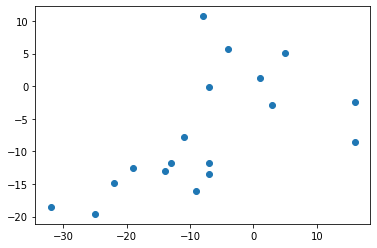

In [646]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=18)
print(predictions)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
mse = metrics.mean_absolute_error(y, predictions)
print (f'Cross-Predicted Accuracy:, {accuracy}')
print (f'MSE:, {mse}')

Correlation is -0.6817322088757516 and p value = 0.0018334044545340487


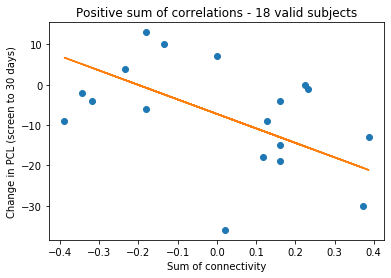

In [647]:
import matplotlib.pyplot as plt
import scipy
#vecAmg_92_93 = deltaMatz[:,93,2]
#vecAmg_92_93 = deltaMatz[:,231,6]
mask = mask90#maskVisit1 #mask30 # or mask90
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.array(vecAmg_92_93)[mask],np.array(PclDat_nonNa['diff_scr_30'])[mask])

line = slope*np.array(vecAmg_92_93)[mask]+intercept


print (f'Correlation is {r_value} and p value = {p_value}')
# plot the regression model

plt.title("See title")
plt.title("Positive sum of correlations - 18 valid subjects")
plt.xlabel("Sum of connectivity")
plt.ylabel('Change in PCL (screen to 30 days)')
plt.plot(np.array(vecAmg_92_93)[mask], np.array(PclDat_nonNa['diff_scr_90'])[mask] , 'o',np.array(vecAmg_92_93)[mask], line)
plt.show()

In [ ]:
# create LOO cross validation
# take each subject out - 
# run regression model and predict subject's score (the one that is out)
# save in vector (scores) and create then correlate with actual subject's score
